## Neural Network with Keras
---------

The problem we're trying to solve here is to classify grayscale images of handwriten digits (28 x 28 pixels) into their 10 categories (0 to 9).

We will use the **MNIST** dataset, a classic in the machine-learning community, which has been around almost as long as the field itself and has been intensively studied. It's a sete of ***60,000*** training images, plus ***10,000*** test images, assembled by the **National Institute of Standards and Technology (the NIST in MNIST)** in 1980s.

### Input
In this cell, we will import all packages and modules we will need.

**NB:** *The **MNIST** dataset comes preloaded in Keras, in the form of a set of four Numpy arrays.*

In [3]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load datasets
`train_images` and `train_labels` form the **training set**, the data that the model will learn from. The model will then be tested on the **test set**, `test_images` and `test_labels`.

In [4]:
(train_image, train_labels),(test_image, test_labels) = mnist.load_data()

### Visualize first 36 image samples

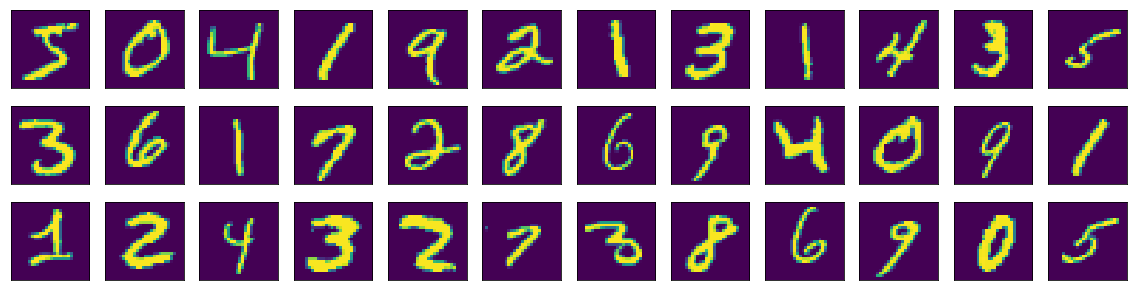

In [5]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(train_image[i]))

The images are encoded as a numpy array. The label is a numpy array of digits ranging from 0-9. The images and labels have a one-to-one correspondance.

#### Training data and label
- The training data is a 3D tensor of 8-bit integer,ie an array of 60000 matrices of 28*28 integers. Each such matrix is a grayscale with coef within 0-255.
- The label is a 1D-tensor with 1-axis with 60000 numbers.

In [10]:
train_image.shape  # check shape of training image. its a (28 x 28) and of length 60000        (l,h,w)

(60000, 28, 28)

In [11]:
len(train_image)

60000

In [12]:
train_image.dtype

dtype('uint8')

In [13]:
# A numpy array of digits randing from 0-9. 

train_labels.shape       

(60000,)

In [14]:
# Since it is a one-to-one correspondance
# with the train_image, it should be of the same lenth
len(train_labels)

60000

#### Testing image and labels

In [15]:
test_image.shape

(10000, 28, 28)

In [16]:
len(test_image)                 # The test image is a set of 10000 images.

10000

### Analysing and visualising an image


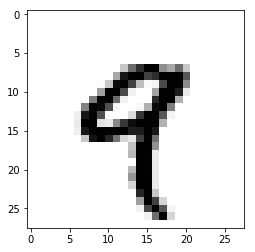

In [21]:
digit = train_image[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [23]:
# Selecting specific elements from a tensor is called tensor slicing. Here we select 10th to 99th elements and
#28x28 pixel for each axis. It is same as train_image[10:100, :,:] or train_image[10:100, 0:28,0:28]
# Croping works same, here we crop a tensor image to be 14x14 in the center as train_image[:,7:-7,7:-7]

my_slice = train_image[10:100]
my_slice.shape

(90, 28, 28)

### The Neural Network
The core building block of neural networks is the **layer**. Some data goes in, and it comes out in a more useful form. Most of deep learning consists of chaining together simple layers that will implement a form of progressive data distillation.

#### Building the network
Here, our network consist of a sequence of two Dense layers, which are densely connected (also called fully connected) neural layers. The second and last layer is a 10-way softmax layer which means it will return 10 probability scores( summing to 1). Each score will be a probability that the current digit image belongs to one of our 10 digit classes.

In [11]:
'''
The first layer should always specify the input shape, which is usually
the shape of the input image. This is specified using 'input_shape'.
'''
network = models.Sequential()

network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

#### Compilation step
Here, the compilation step consist of the following:
- **Loss Function:** This helps the network to calculate its performance, and also how it will steer itself in to the right direction
- **Optimizer:** This helps the network to update its weight base on the data it sees and the loss function.
- **Metrics to monitor during training and testing:** Here we will use the *Accuracy* (a fraction of the images that were correctly classified)

In [12]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

### Preparing the image data
Previously, our training images are stored in an array of shape `(60000,28,28)` of type `unit8` with values in the `[0, 255]` interval. So we will now preprocess the data by reshaping into the shape the network expects `(60000,28*28)` and scaling it so that all values are in the `[0, 1]` interval and of type `float32`.

In [13]:
train_image = train_image.reshape((60000,28*28))  # reshape
train_image = train_image.astype('float32')/255   # normalize
test_image =  test_image.reshape((10000,28*28))
test_image = test_image.astype('float32')/255

### Preparing the labels


In [14]:
train_labels = to_categorical(train_labels)
test_labels =  to_categorical(test_labels)

### Train the network
Now we are ready to train the network. This is done with keras by fiting the network to the training data with `network.fit()`. We will set the **epoch** and **batch number**

**NB:** * The result below display the **loss** of the network over the training and the **accuracy** of the network over the training.*

In [15]:
network.fit(train_image, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.2524 - acc: 0.9280
Epoch 2/5
60000/60000 [==============================] - 1s 14us/step - loss: 0.1037 - acc: 0.9696
Epoch 3/5
60000/60000 [==============================] - 1s 15us/step - loss: 0.0679 - acc: 0.9798
Epoch 4/5
60000/60000 [==============================] - 1s 14us/step - loss: 0.0494 - acc: 0.9849
Epoch 5/5
60000/60000 [==============================] - 1s 14us/step - loss: 0.0365 - acc: 0.9889


### Testing the network
The above training shows an accuracy of **98%**. Now we will testing our network to be sure it works well. We do this using the `network.evaluate()`.

In [28]:
(test_loss, test_acc) = network.evaluate(test_image, test_labels)
print('acc: %f'%test_acc)

10000/10000 [==============================] - 0s 20us/step
acc: 0.979500


## Conclusion
The testing accuracy is **0.979500** while the training accuracy is **0.9889**. We clearly see that the network performs a bit poorly on testing data. This process is **overfitting** which is the gap between the testing and trainig accuracy. In this case (overfitting)- the network performs poorly on the testing than the training

In [9]:
import tensorflow as tf
# output depth
k_output = 64

# image dimensions
image_width = 10
image_height = 10
color_channels = 3

# convolution filter dimensions
filter_size_width = 5
filter_size_height = 5

# input/image
input = tf.placeholder(
    tf.float32,
    shape=[None, image_height, image_width, color_channels])

# weight and bias
weight = tf.Variable(tf.truncated_normal(
    [filter_size_height, filter_size_width, color_channels, k_output]))
weight

<tf.Variable 'Variable_1:0' shape=(5, 5, 3, 64) dtype=float32_ref>